In [1]:
# !pip install pandas_datareader

In [2]:
import pandas as pd 
import pandas_datareader as pdr 

<Axes: xlabel='DATE'>

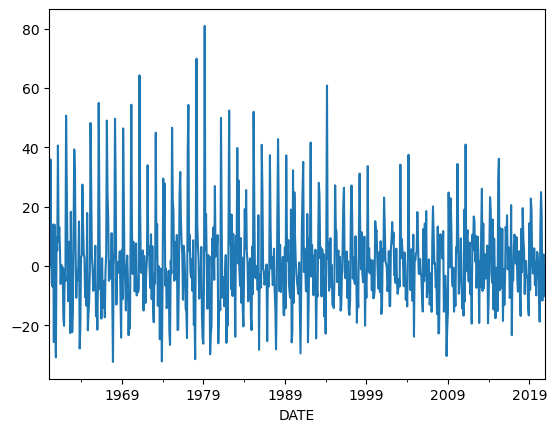

In [3]:
data = pdr.get_data_fred('HOUSTNSA', '1960-01-01', '2020-12-01')
housing = 100 * data.HOUSTNSA.pct_change().dropna() # light cleaning 
# lets plot it, we notice that there is a change in the avrage 
housing.plot()

# Autoregressive 
is Regression aginst itself

## lets build it from scrach 
We will make a `dataframe of shifts`. 
this can be done through a loop, but for clearity of exposition, we will draw it out manually 
We will have shift of one month, two months, and three months so that we will have data from tha past three time entries

Note: This is what will be the parameter in Autoregressive model eqauals 3. or three shifts/lags

In [4]:
df = housing.shift(3).to_frame('s3') # shift columns up 3, in other words this represents 3 months lag/lookback
df['s2'] = housing.shift(2) # two months lag
df['s1'] = housing.shift(1) # one month lag
df.head()

,s3,s2,s1
DATE,,,
1960-02-01,NaN,NaN,NaN
1960-03-01,NaN,NaN,5.465116
1960-04-01,NaN,5.465116,-0.220507
1960-05-01,5.465116,-0.220507,35.911602
1960-06-01,-0.220507,35.911602,5.853659


Notice df contains values for the past three dates for each given date 

ie:
`
1960-05-01 => 5.465116	-0.220507	35.911602
`

In [5]:
X = df.fillna(0) # replace NaN with zero, need to be carefull doing this operation 
X = X.values # converting the dataframe to array
X # np.array

array([[  0.        ,   0.        ,   0.        ],
       [  0.        ,   0.        ,   5.46511628],
       [  0.        ,   5.46511628,  -0.22050717],
       ...,
       [ 16.75084175, -11.67988464,   3.10204082],
       [-11.67988464,   3.10204082,   3.87965162],
       [  3.10204082,   3.87965162, -10.21341463]])

In [6]:
y = housing.values
y #np.array

array([ 5.46511628e+00, -2.20507166e-01,  3.59116022e+01,  5.85365854e+00,
       -5.68356375e+00, -6.92182410e+00,  1.39982502e+01, -2.56331543e+01,
        1.39318885e+01, -1.59420290e+01, -3.08189655e+01,  9.65732087e+00,
        5.25568182e+00,  4.06207827e+01,  8.25335893e+00,  1.31205674e+01,
        5.64263323e+00, -6.08308605e+00,  3.94944708e-01, -1.33752950e+00,
       -4.78468900e-01, -1.74679487e+01, -2.01941748e+01, -1.21654501e+00,
       -5.04926108e+00,  5.07133593e+01,  2.71944923e+01,  5.00676590e+00,
       -1.18556701e+01, -2.19298246e-01,  8.20512821e+00, -2.26134056e+01,
        1.82852143e+01, -1.05769231e+01, -2.23325062e+01, -1.58679446e+01,
        1.34177215e+01,  3.92857143e+01,  3.15705128e+01,  5.17661389e+00,
       -1.07122177e+01, -1.88067445e+00, -4.82485129e+00, -2.08333333e-01,
        1.50313152e+01, -2.78281912e+01, -2.03688181e+01,  3.05263158e+00,
        3.47293156e+00,  2.74432379e+01,  1.39426801e+01,  3.87491502e+00,
        2.87958115e+00, -

In [7]:
# do regression of X against y 
from sklearn.linear_model import LinearRegression

lr = LinearRegression() # Create a model object 
lr.fit(X, y) # train the model with the data 

print(lr.coef_, lr.intercept_) # Print the intercets and the coefficents


[-0.19324672  0.00038469  0.18901563] 1.2013349815993621


In [8]:
from statsmodels.tsa.ar_model import AutoReg
# knowing the organization/math helps on locating functions in libraries

mod = AutoReg(housing, 3, old_names=False)
res = mod.fit()

print(res.summary())

                            AutoReg Model Results                             
Dep. Variable:               HOUSTNSA   No. Observations:                  731
Model:                     AutoReg(3)   Log Likelihood               -3015.486
Method:               Conditional MLE   S.D. of innovations             15.229
Date:                Fri, 15 Mar 2024   AIC                           6040.971
Time:                        12:48:57   BIC                           6063.923
Sample:                    05-01-1960   HQIC                          6049.827
                         - 12-01-2020                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.1511      0.568      2.025      0.043       0.037       2.265
HOUSTNSA.L1     0.1896      0.036      5.231      0.000       0.119       0.261
HOUSTNSA.L2    -0.0006      0.037     -0.016    

/Users/main/anaconda3/envs/tsenv/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
